# Example generated from http://varianceexplained.org/r/kmeans-free-lunch

**Este ejemplo está focalizado en subrayar el denominado como  "No Free Lunch Theorem": http://ti.arc.nasa.gov/m/profile/dhw/papers/78.pdf
**

**“When averaged across all possible situations, every algorithm performs equally well.”**

Para tratar de tener una idea sobre las implicaciones de dicho teorema, ejecutaremos el código que figura a continuación varias veces. 

En primer lugar importamos las bibliotecas que necesitaremos en esta práctica

In [2]:
import random 
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np

Generamos dos poblaciones gausianas con distribuciones concéntricas. 

In [5]:
x = []
y = []
x1 = []
y1 = []
for i in range(1,551):
    aux = random.gauss(0,1)
    x.append(aux)
    aux = random.gauss(0,1)
    y.append(aux)
    #para la segunda población hacemos que las muestras se distribuyan
    #en el entorno de la circunferencia de radio 5 (de acuerdo con una distribucion gausiana)
    r = random.gauss(5,0.25)
    #Los puntos aleatorios son generados de acuerdo con una representación polar 
    #p=(r*cos(angulo),r*sin(angulo)). r se escoge a partir de una distribución gausiana de media 
    #5 y varianza 0.25. El ángulo, por su parte, se genera aleatoriamente según un distribución
    #uniforme en [0,2pi]
    theta = random.uniform(0,2*math.pi)
    x1.append(r*math.cos(theta))
    y1.append(r*math.sin(theta))
    

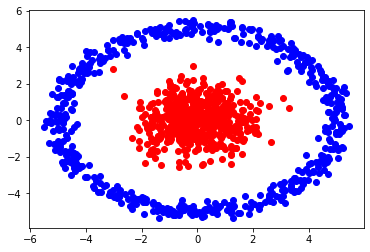

In [6]:
plt.plot(x,y,'ro')
plt.plot(x1,y1,'bo')
plt.show()

Vamos a intentar identificar las dos clases que tenemos empleando kmeans. Para ello, importamos las bibliotecas necesarias e inicializamos la clase Kmeans de scikitlearn. Como podéis comprobar, hemos escogido k=2 y el proceso de inicialización de centroides se hará de modo aleatorio. 

In [7]:
from sklearn import metrics
from sklearn.cluster import KMeans

In [8]:
km = KMeans(n_clusters=2,init='random',n_init=1,verbose=1)

A continuación convertimos a array el par de listas con las que hemos trabajado hasta este punto. 

In [9]:
x = np.array(x)

In [10]:
y = np.array(y)

In [12]:
data = np.vstack((x,y)).T

In [13]:
x1 = np.array(x1)
y1 = np.array(y1)
data1 = np.vstack((x1,y1)).T
data1 = np.concatenate((data,data1))

In [14]:
data1.shape

(1100, 2)

In [15]:
x.shape

(550,)

Representamos la columna 1 respecto a la 0.

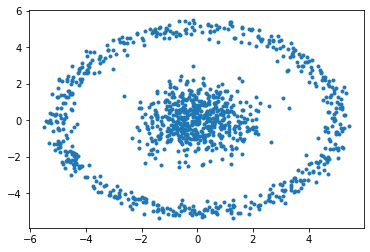

In [16]:
plt.plot(data1[:,0],data1[:,1],'.')
plt.show()

In [17]:
km.fit(data1)

Initialization complete
Iteration 0, inertia 11693.353917470502
Iteration 1, inertia 10716.205835710954
Iteration 2, inertia 10624.405705781131
Iteration 3, inertia 10561.595938853781
Iteration 4, inertia 10536.476499359556
Iteration 5, inertia 10512.43353979512
Iteration 6, inertia 10494.81628754513
Iteration 7, inertia 10476.812037755306
Iteration 8, inertia 10466.371902118026
Iteration 9, inertia 10452.852961156752
Iteration 10, inertia 10441.429658246134
Iteration 11, inertia 10437.950939254399
Iteration 12, inertia 10429.691853420903
Iteration 13, inertia 10417.26842245587
Iteration 14, inertia 10405.375533784661
Iteration 15, inertia 10402.903559118742
Iteration 16, inertia 10401.402935554626
Iteration 17, inertia 10400.609042764818
Converged at iteration 17: center shift 0.0006312249969370751 within tolerance 0.0006761893951216798.


KMeans(init='random', n_clusters=2, n_init=1, verbose=1)

In [18]:
km.cluster_centers_

array([[ 1.25061974,  0.69355668],
       [-2.37966105, -1.38313672]])

In [19]:
km.labels_

array([0, 1, 1, ..., 0, 1, 0], dtype=int32)

In [20]:
km.labels_.shape

(1100,)

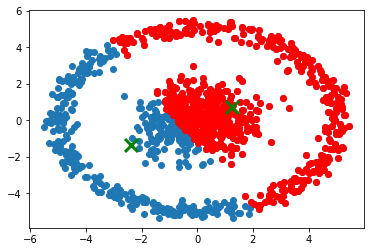

In [21]:
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='x',s=169,linewidths=3,color='g',zorder=10)
plt.scatter(data1[:,0],data1[:,1])
unique_labels = set(km.labels_)
colors = plt.cm.Spectral(np.linspace(0,1,len(unique_labels)))
xy = data1[km.labels_==0]
plt.scatter(xy[:,0],xy[:,1],color='r')
plt.show()


In [22]:
from sklearn.cluster import AgglomerativeClustering

In [23]:
single_link = AgglomerativeClustering(linkage='ward',n_clusters=2)

In [24]:
h_clusters = single_link.fit(data1)

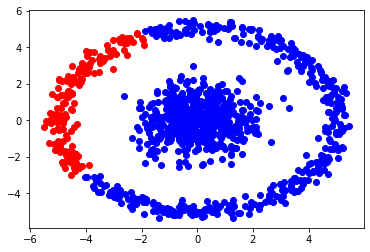

In [25]:
plt.scatter(data1[h_clusters.labels_==0,0],data1[h_clusters.labels_==0,1],color='blue')
plt.scatter(data1[h_clusters.labels_==1,0],data1[h_clusters.labels_==1,1],color='red')

In [34]:
from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(data1, n_neighbors=30, include_self=False)

In [35]:
single_link2 = AgglomerativeClustering(linkage="ward",n_clusters=2,connectivity=connectivity)

In [36]:
h_clusters2 = single_link2.fit(data1)

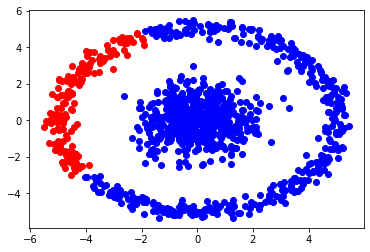

In [39]:
plt.scatter(data1[h_clusters2.labels_==0,0],data1[h_clusters2.labels_==0,1],color='blue')
plt.scatter(data1[h_clusters2.labels_==1,0],data1[h_clusters2.labels_==1,1],color='red')

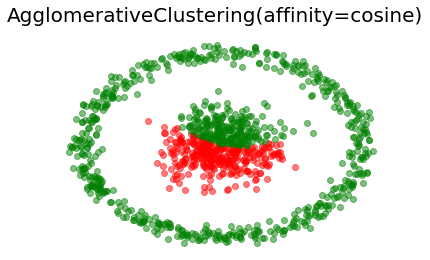

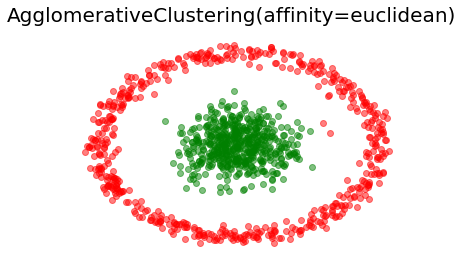

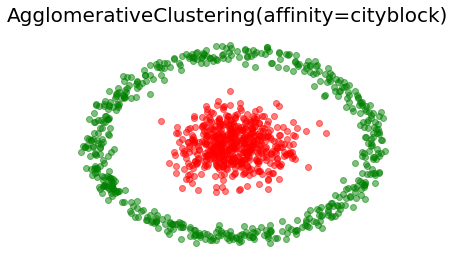

In [40]:
connectivity = kneighbors_graph(data1, n_neighbors=10, include_self=False)

for index, metric in enumerate(["cosine", "euclidean", "cityblock"]):
    model = AgglomerativeClustering(n_clusters=2,
                                    linkage="complete", affinity=metric,connectivity=connectivity)
    model.fit(data1)
    plt.figure()
    
    for l, c in zip(np.arange(model.n_clusters), 'rg'):
        plt.scatter(data1[model.labels_ == l,0],data1[model.labels_ == l,1], c=c, alpha=.5)
    plt.axis('tight')
    plt.axis('off')
    plt.suptitle("AgglomerativeClustering(affinity=%s)" % metric, size=20)


# Vamos a probar otra manera de análisis. Para ello, vamos a expresar los puntos con notación polar. 

In [41]:
r = np.sqrt(data1[:,0]**2+data1[:,1]**2)

In [42]:
theta = np.arctan(data1[:,1]/data1[:,0])

In [43]:
data2 = np.column_stack((r,theta))

In [44]:
data2.shape

(1100, 2)

In [45]:
km.fit(data2)

Initialization complete
Iteration 0, inertia 7891.969409969613
Iteration 1, inertia 3777.9986600521884
Iteration 2, inertia 1375.4831597479395
Iteration 3, inertia 1155.8114079681868
Converged at iteration 3: center shift 3.8688303830185443e-05 within tolerance 0.00022961682766226363.


KMeans(init='random', n_clusters=2, n_init=1, verbose=1)

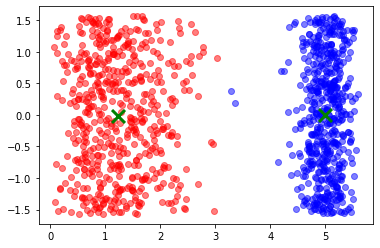

In [46]:
plt.scatter(data2[km.labels_==0,0],data2[km.labels_==0,1],color='r',alpha=0.5)
plt.scatter(data2[km.labels_==1,0],data2[km.labels_==1,1],color='b',alpha=0.5)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='x',s=169,linewidths=3,color='g',zorder=10)


# Otro problema de kmeans viene derivado de la existencia de poblaciones con tamaños muy distinto. En el ejemplo tenemos poblaciones con distinto tamaño.

In [47]:
sizes = np.array([10,100,1000])


** Arriba hemos definido el tamaño de las tres poblaciones. A continuación se definen la media de cada población en cada uno de los ejes. **

In [48]:
avgs_x = np.array([1,4,10])
avgs_y = np.array([5,0,10])

In [49]:
import time

seed = time.time()
data3 = np.zeros(1);

for a_x,a_y,s in zip(avgs_x,avgs_y,sizes):
    cx = []
    cy = []
    for  i in range(s):
        cx.append(random.gauss(a_x,1))
        cy.append(random.gauss(a_y,1))
    cx = np.array(cx)
    cy = np.array(cy)
    aux = np.vstack((cx,cy)).T
    
    if data3.shape[0] == 1:
        data3 = aux
    else:
        data3 = np.concatenate((data3,aux))
        
data3.shape

(1110, 2)

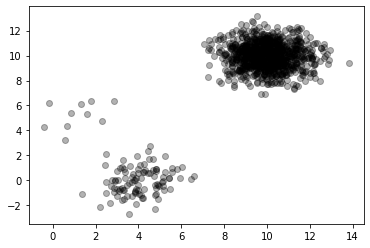

In [50]:
plt.plot(data3[:,0],data3[:,1],'ko',alpha=0.3)

In [51]:
km = KMeans(n_clusters=3,init='random',n_init=1,verbose=1)

In [52]:
km.fit(data3)
km.cluster_centers_.shape

Initialization complete
Iteration 0, inertia 13937.984763509094
Iteration 1, inertia 7164.989683872452
Iteration 2, inertia 2033.566018671036
Iteration 3, inertia 2017.6389694454926
Converged at iteration 3: center shift 0.00012477033655478904 within tolerance 0.0006986568280398353.


(3, 2)

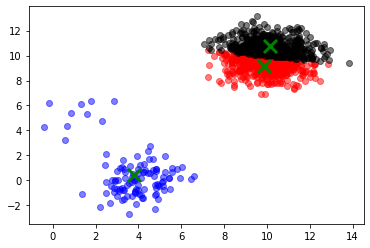

In [66]:
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='x',s=169,linewidths=3,color='g',zorder=10)
plt.scatter(data3[km.labels_==0,0],data3[km.labels_==0,1],color='r',alpha=0.5)
plt.scatter(data3[km.labels_==1,0],data3[km.labels_==1,1],color='b',alpha=0.5)
plt.scatter(data3[km.labels_==2,0],data3[km.labels_==2,1],color='k',alpha=0.5)
plt.show()

En muchos casos la población con más muestras tiene asociadas dos clases, mientras que las otras dos clases son fusionadas en un único cluster.

# Vamos a usar GMM para ver si somos capaces de solucionar algunos de los problemas que hemos destacado

In [54]:
from sklearn import mixture
import itertools
from scipy import linalg
import matplotlib as mpl

In [55]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a mixture of Gaussians with EM
        gmm = mixture.GaussianMixture(n_components=n_components, covariance_type=cv_type)
        gmm.fit(data1)
        bic.append(gmm.bic(data1))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f7c4d673b80>
Traceback (most recent call last):
  File "/home/daniel/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/daniel/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/daniel/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/daniel/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.mat

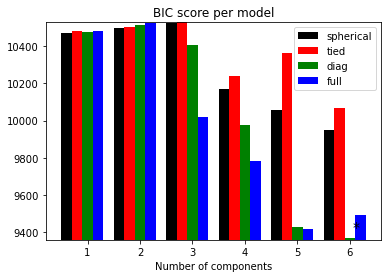

In [58]:
bic = np.array(bic)
color_iter = itertools.cycle(['k', 'r', 'g', 'b', 'c', 'm', 'y'])
clf = best_gmm
bars = []

# Plot the BIC scores

for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
plt.xlabel('Number of components')
plt.legend([b[0] for b in bars], cv_types)


ValueError: expected square "a" matrix

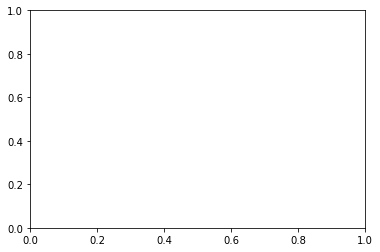

In [59]:
# Plot the winner
splot = plt.subplot(1, 1, 1)
Y_ = clf.predict(data1)
for i, (mean, covar, color) in enumerate(zip(clf.means_, clf.covariances_,
                                             color_iter)):
    #we are computing the eigenvalues of the covariance matrix: v is the sector of eigenvectors; 
    #w is the set of eigenvalues
    v, w = linalg.eigh(covar)
    
    if not np.any(Y_ == i):
        continue
    plt.scatter(data1[Y_ == i, 0], data1[Y_ == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180 * angle / np.pi  # convert to degrees
    v *= 4
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell)

## Ejercicio 2
# Repetir el conjunto de pruebas anterior  y comentar los resultados obtenidos. Habrá que entregar un notebook a modo de informe. En el informe se explicarán:

**1.-** La diferencia en los resultados al aplicar k-means con una inicialización aleatoria frente a una inicialización basada en kmeans++·

**2.-** Las limitaciones al aplicar k-means a los datasets considerados.

**3.-** Aplicación a los datasets de las técnicas de clustering jerárquico utilizadas en este ejemplo. Comparar los resultados con los obtenidos para kmeans.

**4.-** Resultados obtenidos al aplicar GMM a los datasets considerados.

**5.-** Aplicar DBSCAN a los datasets considerados y comentar los resultados obtenidos. 


## 1. Diferencia K-Means con inicialización aleatoria y K-Means++

In [132]:
def plotClusters(X, labels, title): # Plot 2d clusterig problem
    
    colors = "bgrcmykw"
    color_index = 0
    
    for cluster in np.unique(labels):
        plt.scatter(X[labels==cluster,0],
                    X[labels==cluster,1],
                    color=colors[color_index], alpha=.3)
        color_index += 1
    plt.legend([cluster for cluster in np.unique(labels)])
    plt.title(title)
    
   

In [133]:
from sklearn.cluster import KMeans

# Explicar Aqui diferecnia en el metodo de inicialización

### 1.1 Pruebas con el conjunto de datos corona circular

In [134]:
Kmeans_random = KMeans(n_clusters=2, init='random')
Kmeans_plus = KMeans(n_clusters=2)

Kmeans_random.fit(data1)
Kmeans_plus.fit(data1)

KMeans(n_clusters=2)

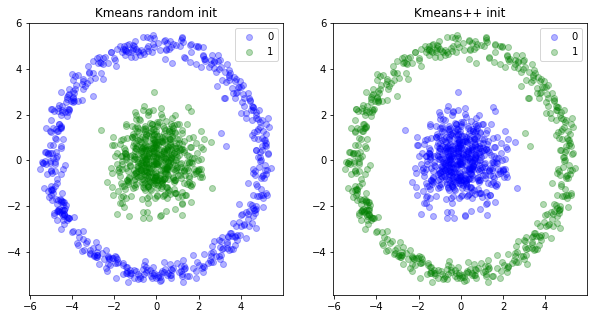

In [142]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plotClusters(data1, Kmeans_random.labels_, title='Kmeans random init')
plt.subplot(1, 2, 2)
plotClusters(data1, Kmeans_plus.labels_, title='Kmeans++ init')

### 1.2 Pruebas con el conjunto de datos coordenadas polares

In [137]:
Kmeans_random = KMeans(n_clusters=2, init='random')
Kmeans_plus = KMeans(n_clusters=2)

Kmeans_random.fit(data2)
Kmeans_plus.fit(data2)

KMeans(n_clusters=2)

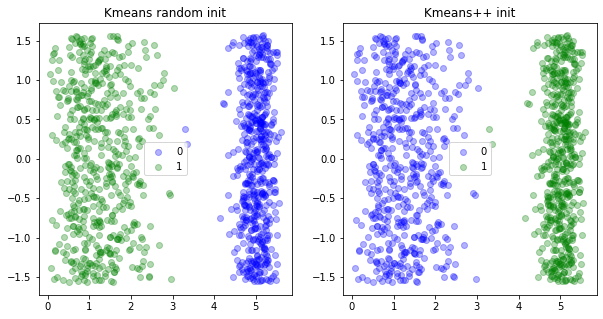

In [143]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plotClusters(data2, Kmeans_random.labels_, title='Kmeans random init')
plt.subplot(1, 2, 2)
plotClusters(data2, Kmeans_plus.labels_, title='Kmeans++ init')

### 1.3 Pruebas con el conjunto de datos con tamaño de poblaciones desbalanceado

In [146]:
Kmeans_random = KMeans(n_clusters=3, init='random')
Kmeans_plus = KMeans(n_clusters=3)

Kmeans_random.fit(data3)
Kmeans_plus.fit(data3)

KMeans(n_clusters=3)

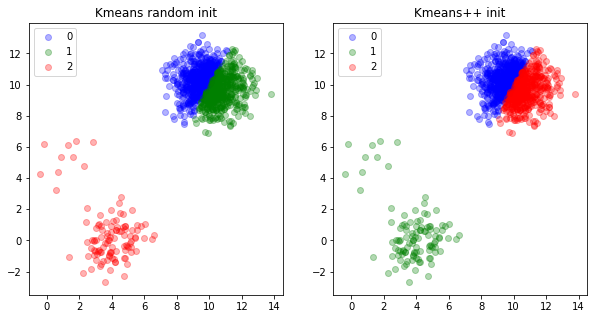

In [147]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plotClusters(data3, Kmeans_random.labels_, title='Kmeans random init')
plt.subplot(1, 2, 2)
plotClusters(data3, Kmeans_plus.labels_, title='Kmeans++ init')